In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r'/kaggle/input/iris/Iris.csv',index_col = 'Id')

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# **data visualization**

In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

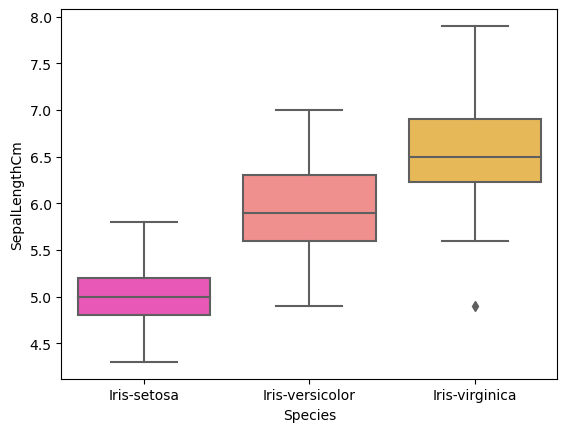

In [6]:
sns.boxplot(data = df , y = 'SepalLengthCm' , x = 'Species' , palette = 'spring')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


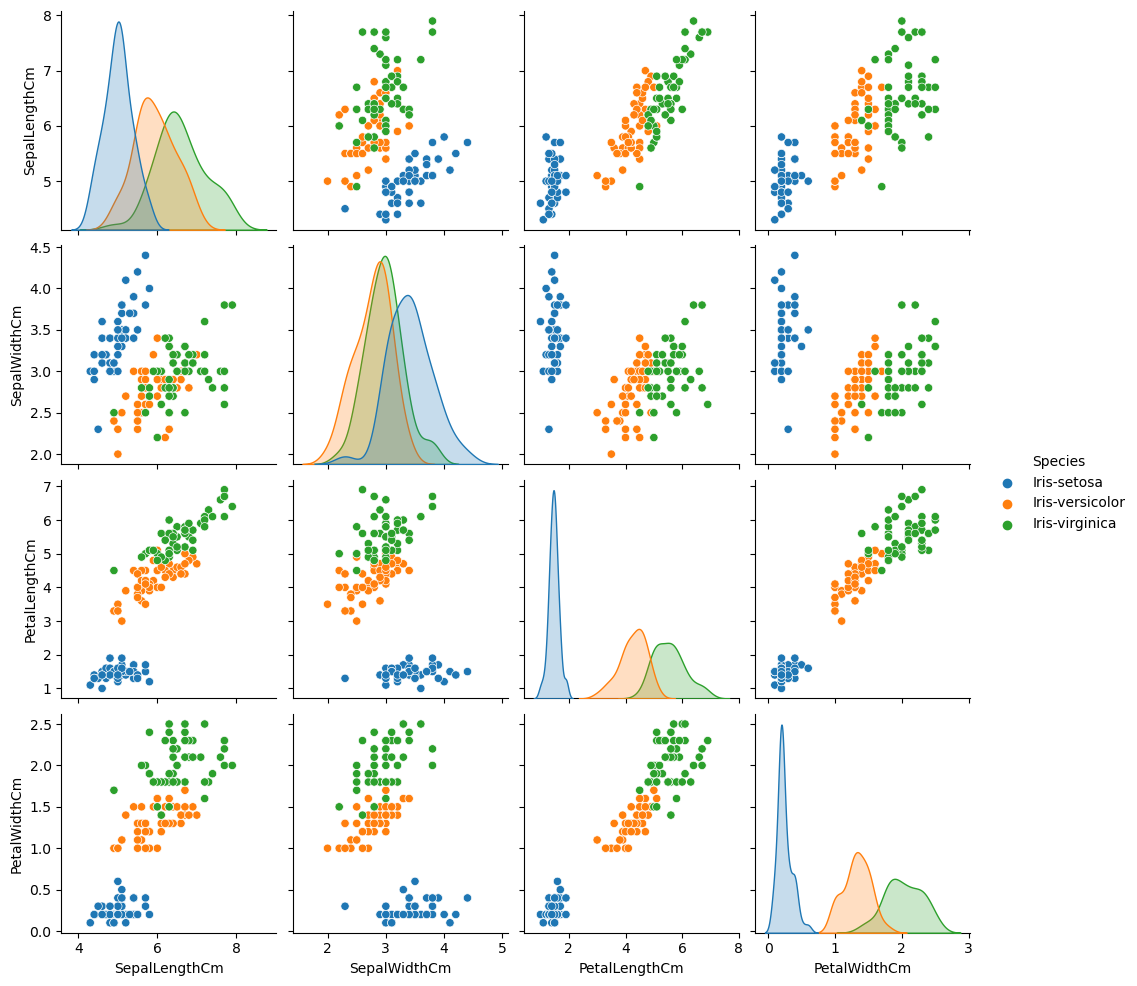

In [7]:
sns.pairplot(df, hue = 'Species')

> * **insight: the setosa species is somehow not related or different from other two species**

# **checking the outliers**

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

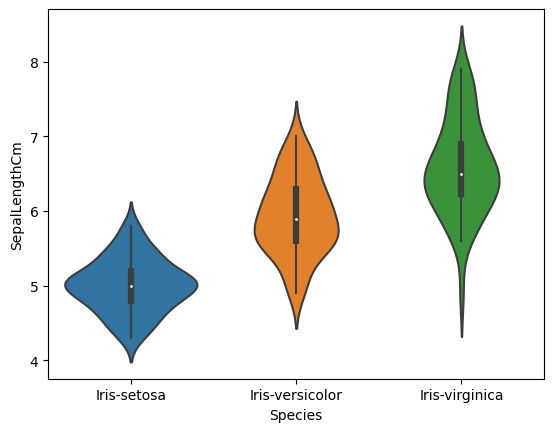

In [8]:
sns.violinplot(data = df , x = 'Species' , y = 'SepalLengthCm')

> * **insight: the SepalLengthCm is not having that much outlier**

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

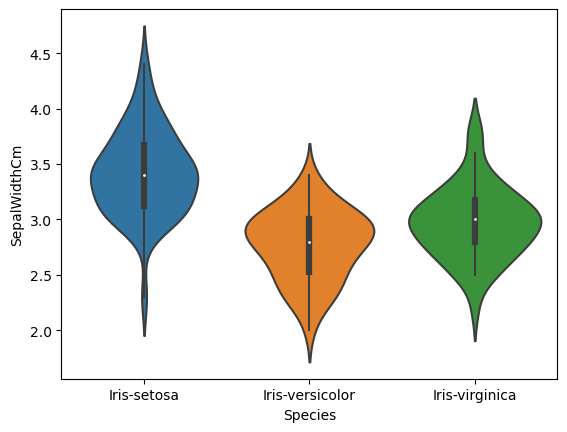

In [9]:
sns.violinplot(data = df , x = 'Species' , y = 'SepalWidthCm')

> * **insight: the SepalWidthCm is not having that much outlier**

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

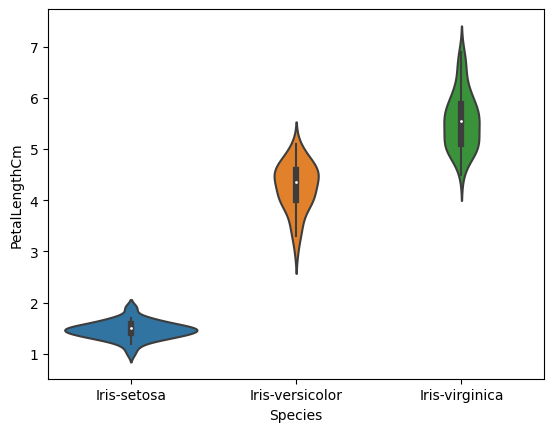

In [10]:
sns.violinplot(data = df , x = 'Species' , y = 'PetalLengthCm')

> * **insight: the PetalLengthCm is not having that much outlier**

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

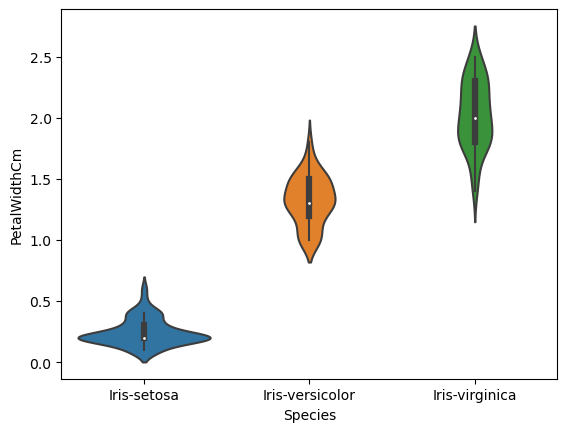

In [11]:
sns.violinplot(data = df , x = 'Species' , y = 'PetalWidthCm')

> * **insight: the PetalWidthCm is not having that much outlier**

In [12]:
X = df.drop('Species' , axis = 1)

In [13]:
y = df['Species']

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# **machine learning algorithms**

1. > **logistic regression**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [17]:
def final_model(param_grid,model1):
    mach_model = model1
    grid_model = GridSearchCV(mach_model,param_grid,verbose = 2 , error_score = 'raise')
    grid_model.fit(X_train,y_train)
    y_pred = grid_model.predict(X_test)
    print(classification_report(y_pred,y_test))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [18]:
log_model = LogisticRegression(solver = 'saga',max_iter = 10000)

In [19]:
param_grid = {'penalty':['l1','l2'],'C':[0.2,0.4,0.6,0.8,1]}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................................C=0.2, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.2, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.2, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.2, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.2, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.2, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.2, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.2, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.2, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.2, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.4, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.4

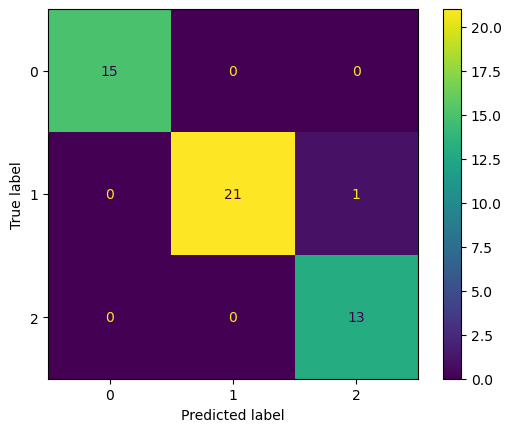

In [20]:
final_model(param_grid,log_model)

# k nearest classifier

In [21]:
scaler = StandardScaler()

In [22]:
knn_model = KNeighborsClassifier()

In [23]:
operation = [('scaler',scaler),('knn_model',knn_model)]

In [24]:
pipe = Pipeline(operation)

In [25]:
n_neighbors = np.arange(1,50,1)

In [26]:
param_grid = {'knn_model__n_neighbors':n_neighbors}

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................knn_model__n_neighbors=1; total time=   0.0s
[CV] END ...........................knn_model__n_neighbors=1; total time=   0.0s
[CV] END ...........................knn_model__n_neighbors=1; total time=   0.0s
[CV] END ...........................knn_model__n_neighbors=1; total time=   0.0s
[CV] END ...........................knn_model__n_neighbors=1; total time=   0.0s
[CV] END ...........................knn_model__n_neighbors=2; total time=   0.0s
[CV] END ...........................knn_model__n_neighbors=2; total time=   0.0s
[CV] END ...........................knn_model__n_neighbors=2; total time=   0.0s
[CV] END ...........................knn_model__n_neighbors=2; total time=   0.0s
[CV] END ...........................knn_model__n_neighbors=2; total time=   0.0s
[CV] END ...........................knn_model__n_neighbors=3; total time=   0.0s
[CV] END ...........................knn_model__

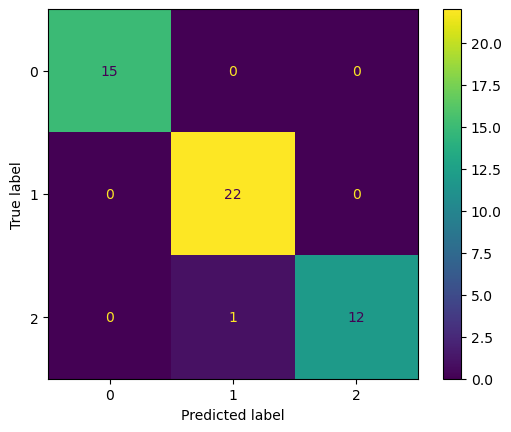

In [27]:
final_model(param_grid,pipe)

# **support vector machine**

In [28]:
from sklearn.svm import SVC

In [29]:
svc = SVC()

In [30]:
param_grid = {'kernel':['linear', 'poly', 'rbf'] , 'C':[0.2,0.4,0.6,0.8,1]}

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ...............................C=0.2, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.2, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.2, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.2, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.2, kernel=linear; total time=   0.0s
[CV] END .................................C=0.2, kernel=poly; total time=   0.0s
[CV] END .................................C=0.2, kernel=poly; total time=   0.0s
[CV] END .................................C=0.2, kernel=poly; total time=   0.0s
[CV] END .................................C=0.2, kernel=poly; total time=   0.0s
[CV] END .................................C=0.2, kernel=poly; total time=   0.0s
[CV] END ..................................C=0.2, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.2

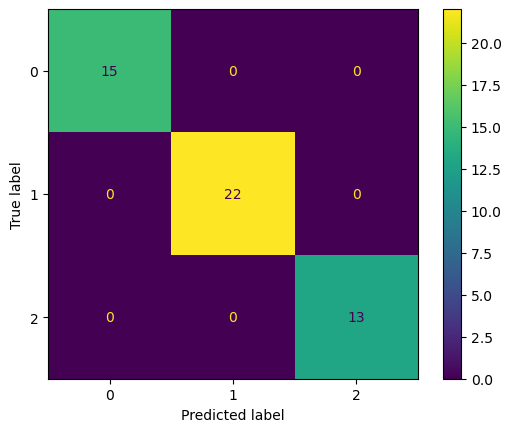

In [31]:
final_model(param_grid,svc)

> 1. **we are getting good accuracy by support vector machine so we keep this as our final model**